# Retail Sales Analysis with Walmart Dataset

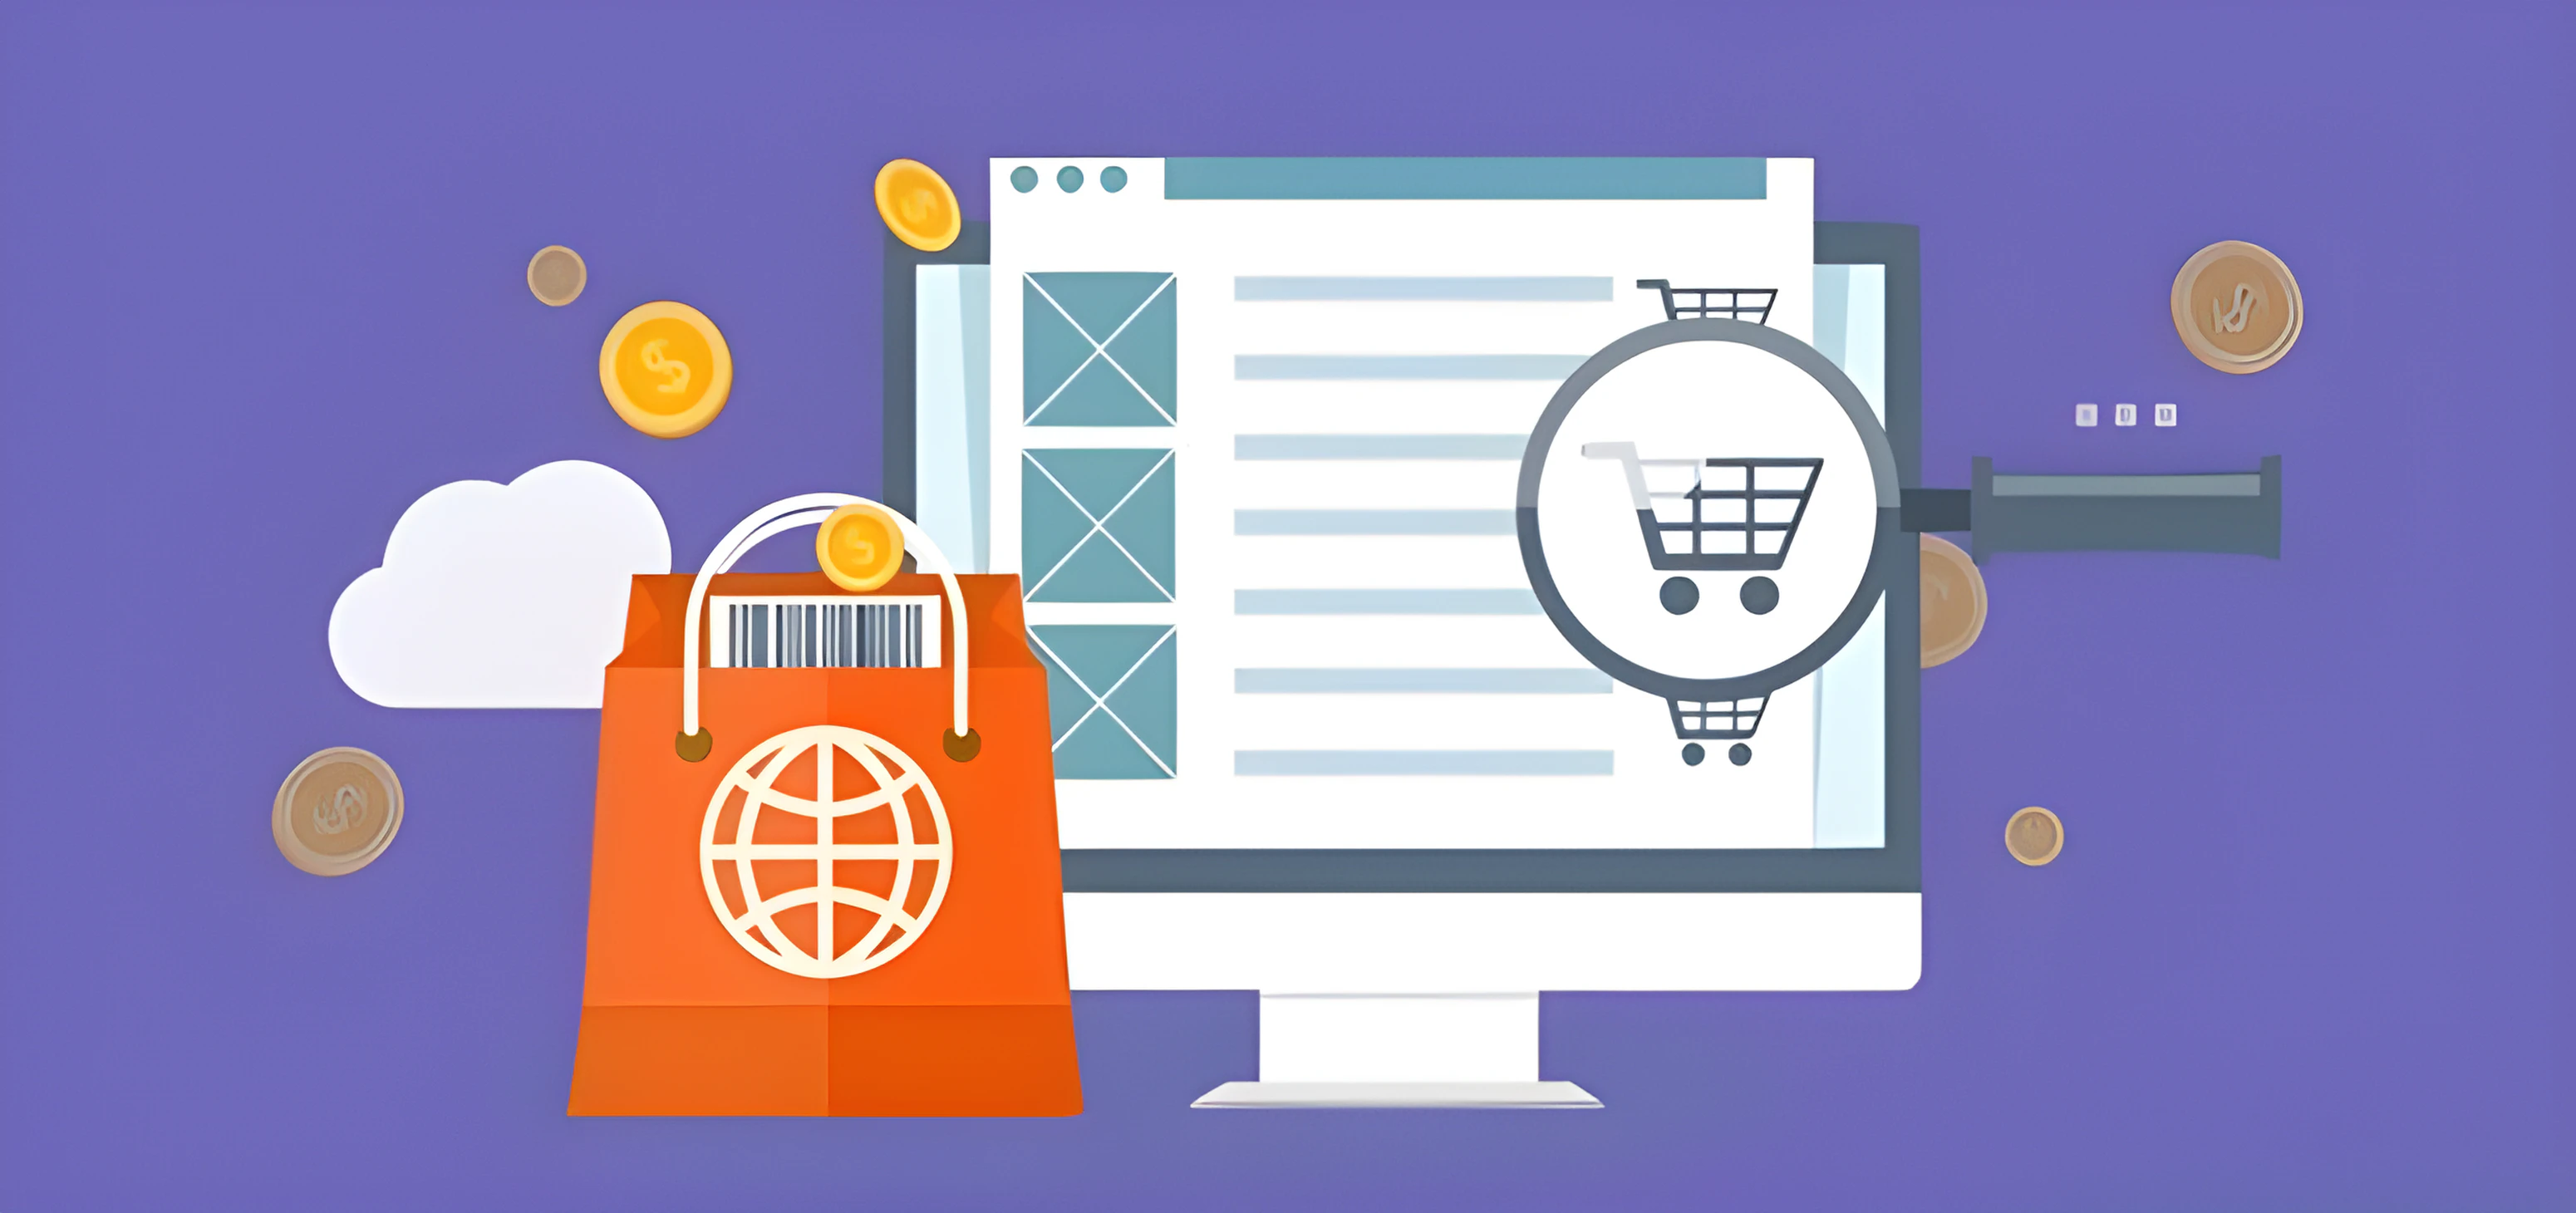

# Introduction
In today's competitive retail world, figuring out how to sell the most stuff is a big deal. Walmart, one of the biggest retail chains out there, has to constantly figure out how to sell more in its stores. In this project, we're going to look at a bunch of data from Walmart's stores to see if we can find any patterns or insights that might help them sell more.

# The Challenge
Selling stuff isn't easy. There are lots of things that can affect how much a store sells, like where it's located, what time of year it is, and even things like holidays. Walmart has to deal with all these things to try to sell as much as possible. We're going to try to help them out by looking at their sales data and trying to understand what's going on.

# Problem Statement
Against this backdrop, our analysis seeks to address several key questions that are central to understanding and optimizing sales performance in Walmart retail stores:

1. Which store has maximum sales?
2. Which store has maximum standard deviation i.e., the sales vary a lot?
3. Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.
4. Provide a monthly and semester view of sales in units and give insights.
5. Plot the relations between weekly sales vs. other numeric features and give insights.

# Dataset Description
Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this assignment is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

**This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in which you will find the following fields:**
- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

**Holiday Events**
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


# Install libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

# 1. Import Data

Read the dataset

In [2]:
data = pd.read_csv("/kaggle/input/walmart-dataset-retail/Walmart_Store_sales.csv")

# 2. Display Data

In [3]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
data.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2450,18,18-06-2010,1183225.92,0,65.96,2.805,132.473333,9.269
3950,28,21-10-2011,1203172.05,0,73.05,3.842,129.782161,12.890
4594,33,11-06-2010,310800.79,0,93.52,3.057,126.111903,9.849
2830,20,06-04-2012,2565259.92,0,50.06,3.996,214.238705,7.139
5177,37,27-08-2010,512157.25,0,84.62,2.619,210.329211,8.360
737,6,09-07-2010,1690317.99,0,80.93,2.642,212.629655,6.973
4505,32,24-06-2011,1163869.52,0,65.06,3.661,192.998266,8.595
3164,23,11-06-2010,1439432.06,0,58.35,2.830,132.435742,5.435
3551,25,18-05-2012,717207.19,0,58.21,3.848,214.548557,7.139
2831,20,13-04-2012,2045396.06,0,45.68,4.044,214.312703,7.139


In [5]:
data.tail(10) 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


# Data Preprocessing

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

As noticed the data type of the "Date" is object to date so we will convert it into Date

In [8]:
# Convert "Date" to datetime formate
data['Date'] =  pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [9]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


# 3. Visualize quantitative variables distributions 

In [10]:
walmart_data = data[['Weekly_Sales','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
walmart_data.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106


array([[<Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'Unemployment'}>, <Axes: >]], dtype=object)

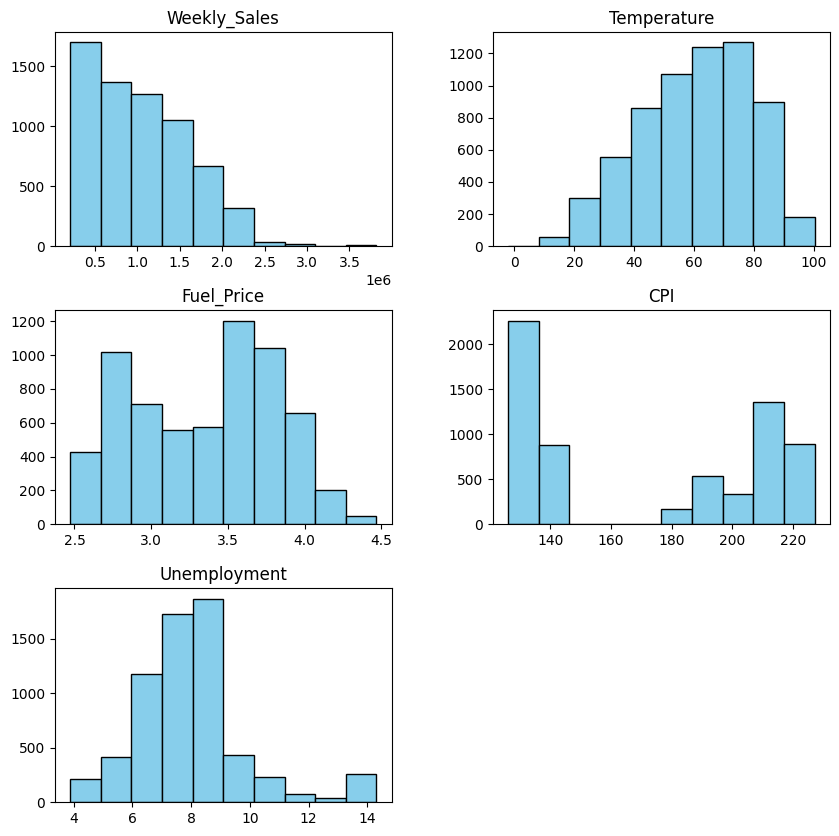

In [11]:
walmart_data.hist(bins=10, grid= False, figsize=(10,10), color='skyblue', edgecolor='black')

Text(0.5, 1.0, 'Boxplot of Unemployment')

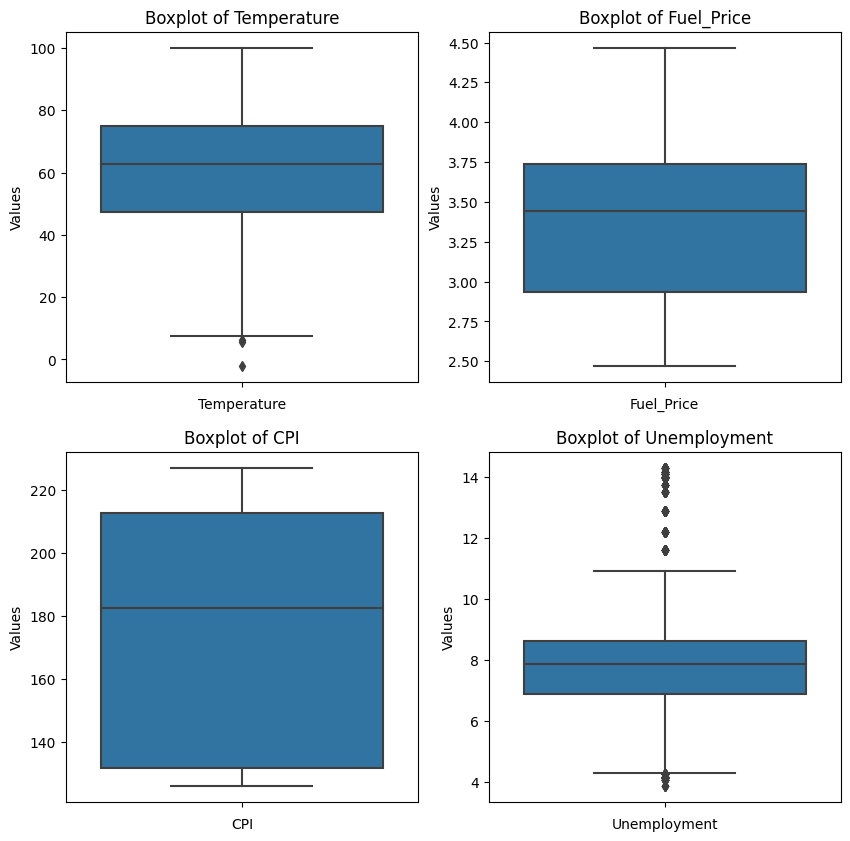

In [12]:
# set the figure size for the subplots
plt.figure(figsize=(10, 10))


# 1st subplot ('Temperature')
plt.subplot(2,2,1)
sns.boxplot(y = walmart_data['Temperature'])
plt.xlabel('Temperature')
plt.ylabel('Values')
plt.title('Boxplot of Temperature')

# 2nd subplot ('Fuel_Price')
plt.subplot(2,2,2)
sns.boxplot(y = walmart_data['Fuel_Price'])
plt.xlabel('Fuel_Price')
plt.ylabel('Values')
plt.title('Boxplot of Fuel_Price')

# 3rd subplot ('CPI')
plt.subplot(2,2,3)
sns.boxplot(y = walmart_data['CPI'])
plt.xlabel('CPI')
plt.ylabel('Values')
plt.title('Boxplot of CPI')

# 4th subplot ('Unemployment')
plt.subplot(2,2,4)
sns.boxplot(y = walmart_data['Unemployment'])
plt.xlabel('Unemployment')
plt.ylabel('Values')
plt.title('Boxplot of Unemployment')

In [13]:
# Drop outliers
walmart_data = walmart_data[(walmart_data['Temperature']>10) & (walmart_data['Unemployment']>4.5) & (walmart_data['Unemployment']<10)]
walmart_data.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106


Text(0.5, 1.0, 'Boxplot of Unemployment')

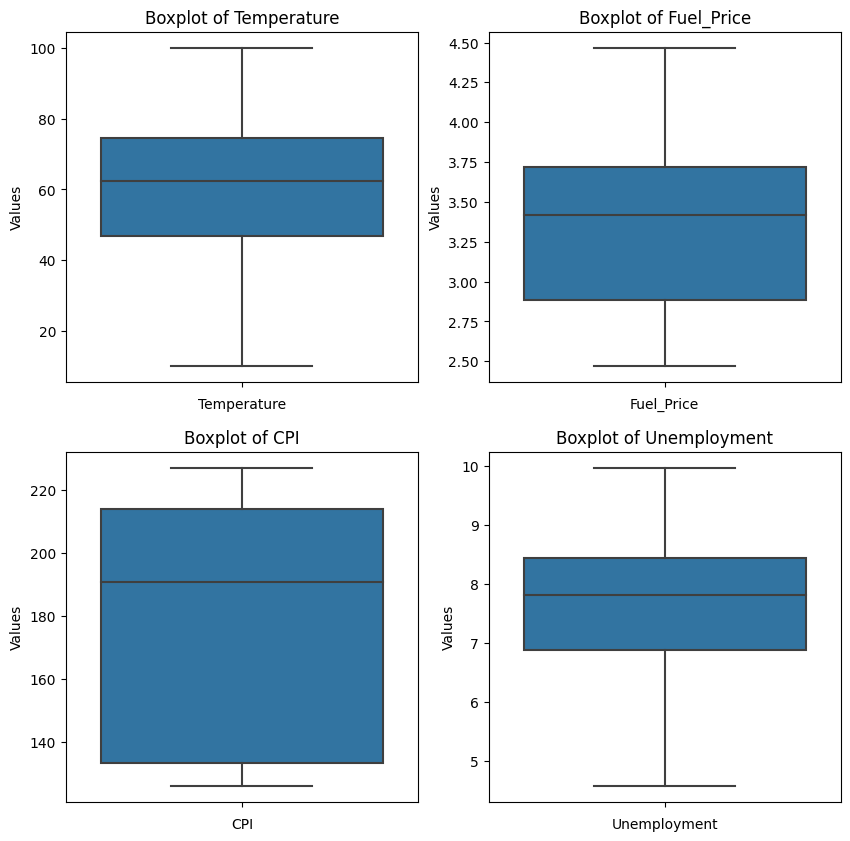

In [14]:
# set the figure size for the subplots
plt.figure(figsize=(10, 10))


# 1st subplot ('Temperature')
plt.subplot(2,2,1)
sns.boxplot(y = walmart_data['Temperature'])
plt.xlabel('Temperature')
plt.ylabel('Values')
plt.title('Boxplot of Temperature')

# 2nd subplot ('Fuel_Price')
plt.subplot(2,2,2)
sns.boxplot(y = walmart_data['Fuel_Price'])
plt.xlabel('Fuel_Price')
plt.ylabel('Values')
plt.title('Boxplot of Fuel_Price')

# 3rd subplot ('CPI')
plt.subplot(2,2,3)
sns.boxplot(y = walmart_data['CPI'])
plt.xlabel('CPI')
plt.ylabel('Values')
plt.title('Boxplot of CPI')

# 4th subplot ('Unemployment')
plt.subplot(2,2,4)
sns.boxplot(y = walmart_data['Unemployment'])
plt.xlabel('Unemployment')
plt.ylabel('Values')
plt.title('Boxplot of Unemployment')

# 4. Data Cleaning

In [15]:
# Check for null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [16]:
# Check for duplicated values
data.duplicated().sum()

0

<hr>

<h2>1. Which store has maximum sales?<h2>

In [17]:
total_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
total_sales.head(1)

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

bar plot visualize the total sales of each store, the max and the min store's total sales

<Axes: xlabel='Store'>

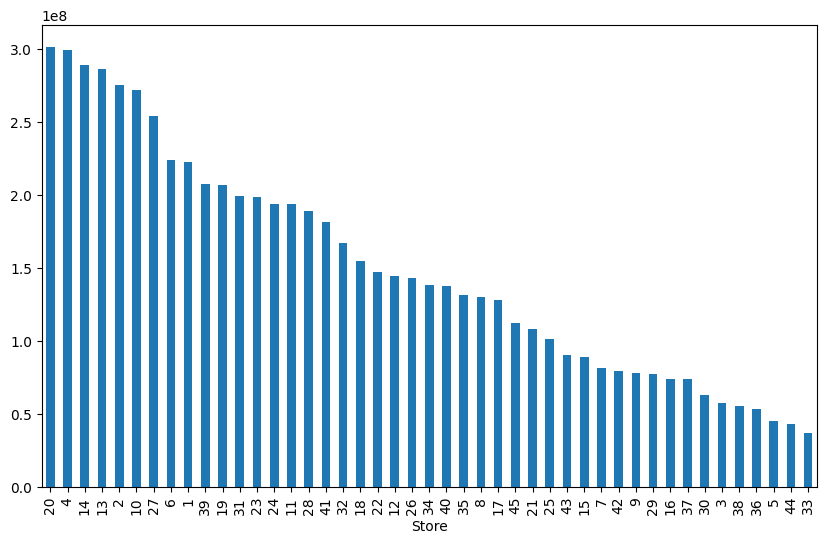

In [18]:
plt.figure(figsize=(10, 6))
total_sales.plot(kind='bar')

Store 20 has the maximum total_sales

<hr>

<h2>2. Which store has maximum standard deviation i.e., the sales vary a lot<h2>

In [19]:
max_std = data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
max_std.head(1)

Store
14    317569.949476
Name: Weekly_Sales, dtype: float64

Bar plot visualize the stores with their std, the max and min store's std

<Axes: xlabel='Store'>

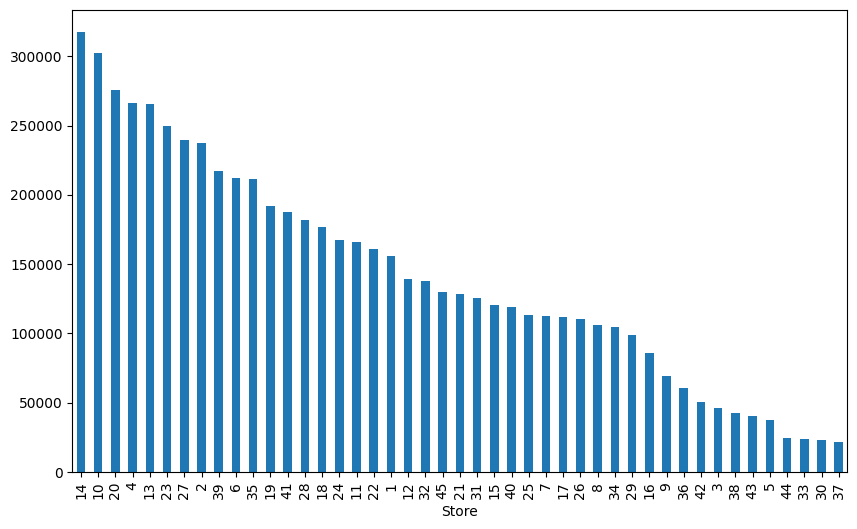

In [20]:
plt.figure(figsize=(10, 6))
max_std.plot(kind='bar')

histogram shows the frequancies of std for each store

<Axes: ylabel='Frequency'>

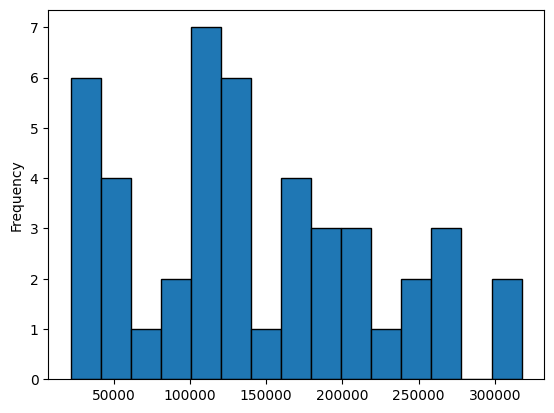

In [21]:
max_std.plot(kind='hist', bins=15, edgecolor= 'black')

Store 14 has the maximum standared deviation (its sales vary alot)

<hr>

<h2>3. Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.<h2>

In [22]:
# Holidays Events
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [23]:
# Find the mean for all stores sales for each day
non_holidays_sales = data[data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
non_holidays_sales

1041256.3802088555

In [24]:
# Find the mean for all stores sales for holidays 
# day_sales.loc[day_sales.Date.isin(Super_Bowl)]
# Convert holiday lists to datetime objects
Super_Bowl = pd.to_datetime(Super_Bowl, format='%d-%m-%Y')
Labour_Day = pd.to_datetime(Labour_Day, format='%d-%m-%Y')
Thanksgiving = pd.to_datetime(Thanksgiving, format='%d-%m-%Y')
Christmas = pd.to_datetime(Christmas, format='%d-%m-%Y')

# Filter data for each holiday and calculate mean of total store sales
super_bowl_sales = data[data['Date'].isin(Super_Bowl)]['Weekly_Sales'].mean()
labour_day_sales = data[data['Date'].isin(Labour_Day)]['Weekly_Sales'].mean()
thanksgiving_sales = data[data['Date'].isin(Thanksgiving)]['Weekly_Sales'].mean()
christmas_sales = data[data['Date'].isin(Christmas)]['Weekly_Sales'].mean()

print("super_bowl_sales: ", super_bowl_sales)
print("labour_day_sales: ", labour_day_sales)
print("thanksgiving_sales: ", thanksgiving_sales)
print("christmas_sales: ", christmas_sales)
print("non_holidays_sales: ", non_holidays_sales)

super_bowl_sales:  1079127.9877037038
labour_day_sales:  1042427.293925926
thanksgiving_sales:  1471273.427777778
christmas_sales:  960833.1115555555
non_holidays_sales:  1041256.3802088555


As noticed, Thanks giving, Super bowl, and Labour day have higher sales than the mean sales in the non-holiday season for all stores together.

<hr>

<h2>4. Provide a monthly and semester view of sales in units and give insights.<h2>

In [25]:
# Create new columns for months and years  
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


[Text(0, 25, '1.05741e+06'),
 Text(0, 25, '1.01067e+06'),
 Text(0, 25, '1.0285e+06'),
 Text(0, 25, '1.03728e+06'),
 Text(0, 25, '1.06803e+06'),
 Text(0, 25, '1.03369e+06'),
 Text(0, 25, '1.04245e+06'),
 Text(0, 25, '984822'),
 Text(0, 25, '965164'),
 Text(0, 25, '1.12696e+06'),
 Text(0, 25, '1.28338e+06')]

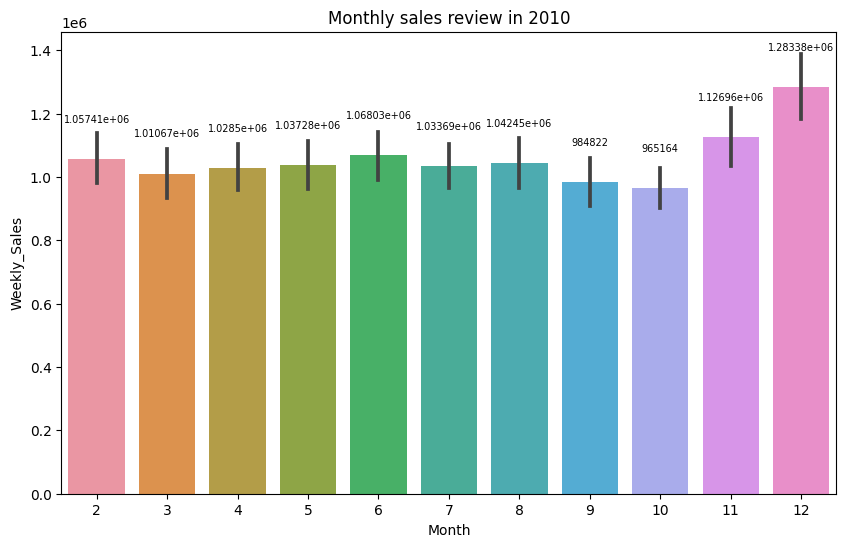

In [26]:
plt.figure(figsize=(10,6))
plot = sns.barplot(x=data[data.Year==2010]['Month'], y=data[data.Year==2010]['Weekly_Sales'])
plt.title('Monthly sales review in 2010')
plot.bar_label(plot.containers[0], padding= 25, fontsize=7)

As noticed, December was the highest month in sales in 2010 and Octuber was the least one

[Text(0, 25, '909466'),
 Text(0, 25, '1.03517e+06'),
 Text(0, 25, '996425'),
 Text(0, 25, '1.00678e+06'),
 Text(0, 25, '1.00916e+06'),
 Text(0, 25, '1.0543e+06'),
 Text(0, 25, '1.02183e+06'),
 Text(0, 25, '1.04777e+06'),
 Text(0, 25, '981546'),
 Text(0, 25, '1.01812e+06'),
 Text(0, 25, '1.16757e+06'),
 Text(0, 25, '1.28035e+06')]

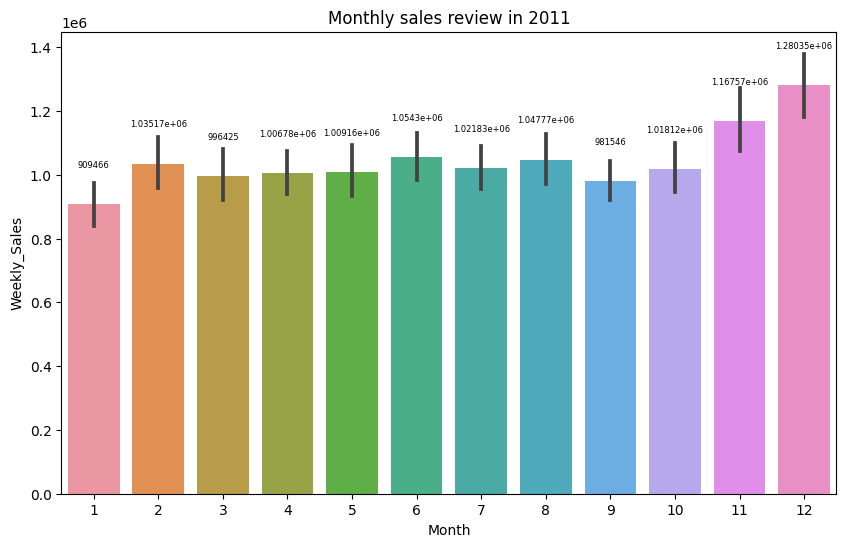

In [27]:
plt.figure(figsize=(10,6))
plot = sns.barplot(x=data[data.Year==2011]['Month'], y=data[data.Year==2011]['Weekly_Sales'])
plt.title('Monthly sales review in 2011')
plot.bar_label(plot.containers[0], padding= 25, fontsize=6)

As noticed, December was the highest month in sales in 2011 and January was the least one

Dataset provides data of 10 months only in 2012

[Text(0, 25, '938303'),
 Text(0, 25, '1.06702e+06'),
 Text(0, 25, '1.02893e+06'),
 Text(0, 25, '1.04956e+06'),
 Text(0, 25, '1.0487e+06'),
 Text(0, 25, '1.06938e+06'),
 Text(0, 25, '1.04172e+06'),
 Text(0, 25, '1.05267e+06'),
 Text(0, 25, '1.00359e+06'),
 Text(0, 25, '1.02423e+06')]

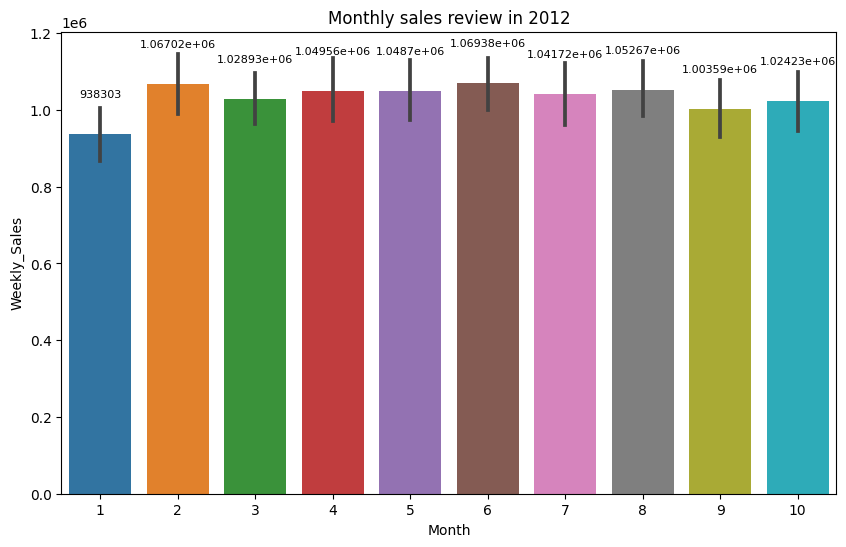

In [28]:
plt.figure(figsize=(10,6))
plot = sns.barplot(x=data[data.Year==2012]['Month'], y=data[data.Year==2012]['Weekly_Sales'])
plt.title('Monthly sales review in 2012')
plot.bar_label(plot.containers[0], padding= 25, fontsize=8)

In the 10 months of 2012, Jun was the highest month in sales and January was the least one

<h3>Semester sales review<h3>

In [29]:
# Define function to determine the semester based on month
def get_semester(month):
    if month in range(1, 7):
        return '1st Semester'
    else:
        return '2nd Semester'

# Apply the function to create 'Semester' column
data['Semester'] = data['Month'].apply(get_semester)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1st Semester
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1st Semester
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1st Semester
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1st Semester
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,1st Semester


In [30]:
semester_sales = data.groupby('Semester')['Weekly_Sales'].sum()
semester_sales

Semester
1st Semester    3.320727e+09
2nd Semester    3.416492e+09
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Semester', ylabel='Weekly_Sales'>

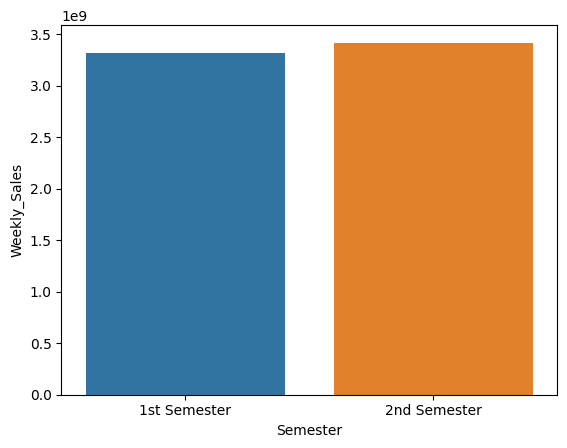

In [31]:
sns.barplot(y=semester_sales, x=semester_sales.index)

The sales in 2nd semester is little greater than the sales in the 1st one.

<h3>Yearly review of sales<h3>

[Text(0, 3, '2.28889e+09'),
 Text(0, 3, '2.4482e+09'),
 Text(0, 3, '2.00013e+09')]

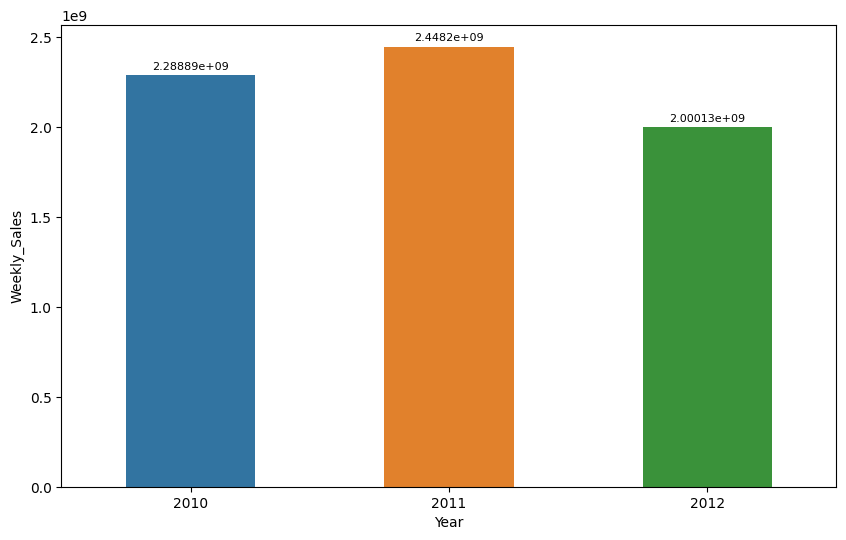

In [32]:
yearly_sales = pd.DataFrame(data.groupby('Year')['Weekly_Sales'].sum())

plt.figure(figsize=(10,6))
plot = sns.barplot(x = yearly_sales.index, y = yearly_sales['Weekly_Sales'], width=0.5)
plot.bar_label(plot.containers[0], padding=3, fontsize=8)

As noticed, 2011 was the highest year in sales and 2012 was the least one

<h2>5. Plot the relations between weekly sales vs. other numeric features and give insights.<h2>

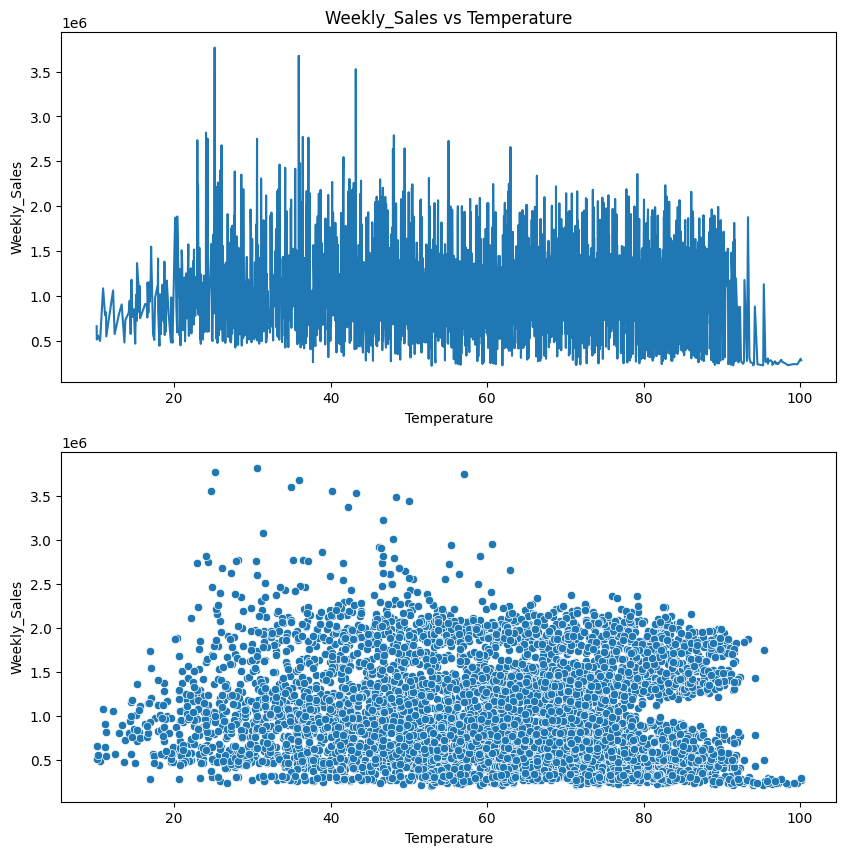

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.lineplot(x=walmart_data['Temperature'], y=walmart_data['Weekly_Sales'], errorbar=None)
plt.title('Weekly_Sales vs Temperature')
plt.subplot(2,1,2)
sns.scatterplot(x=walmart_data['Temperature'], y=walmart_data['Weekly_Sales'])
plt.show()

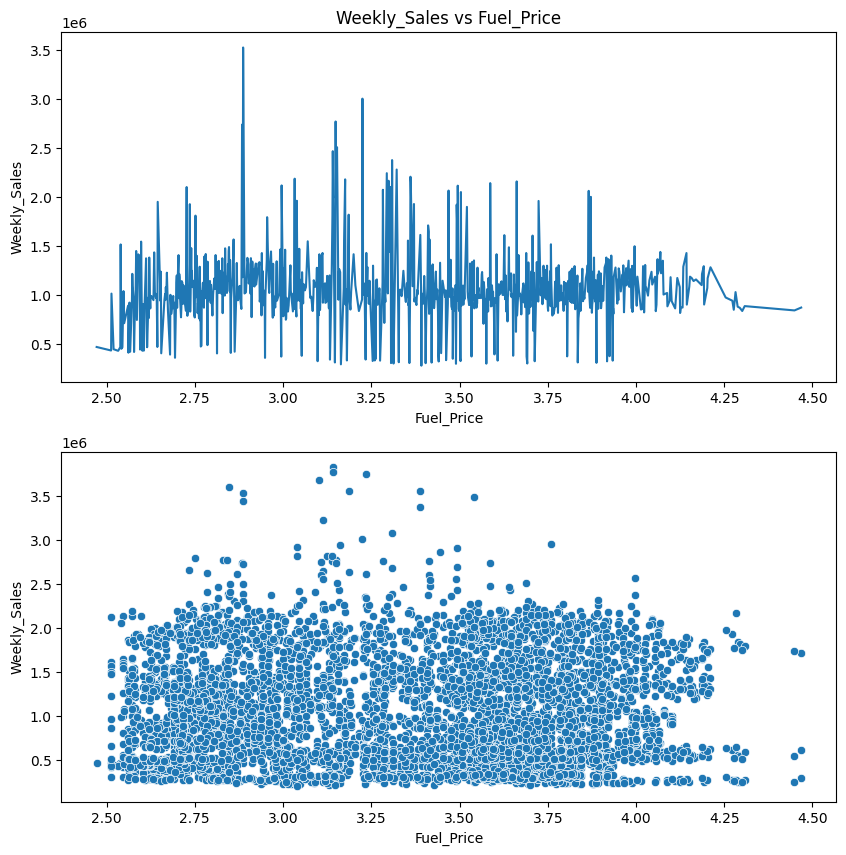

In [34]:
# plt.figure(figsize=(10,6))
# sns.lineplot(x=walmart_data['Fuel_Price'], y=walmart_data['Weekly_Sales'], errorbar=None)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.lineplot(x=walmart_data['Fuel_Price'], y=walmart_data['Weekly_Sales'], errorbar=None)
plt.title('Weekly_Sales vs Fuel_Price')
plt.subplot(2,1,2)
sns.scatterplot(x=walmart_data['Fuel_Price'], y=walmart_data['Weekly_Sales'])
plt.show()

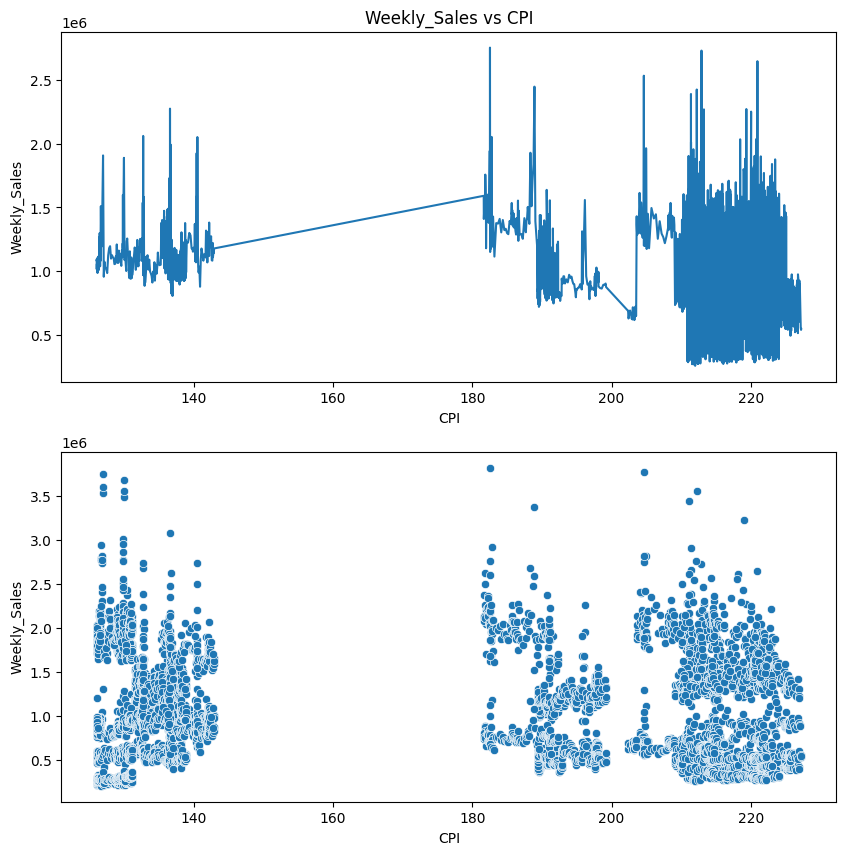

In [35]:
# plt.figure(figsize=(10,6))
# sns.lineplot(x=walmart_data['CPI'], y=walmart_data['Weekly_Sales'], errorbar=None)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.lineplot(x=walmart_data['CPI'], y=walmart_data['Weekly_Sales'], errorbar=None)
plt.title('Weekly_Sales vs CPI')
plt.subplot(2,1,2)
sns.scatterplot(x=walmart_data['CPI'], y=walmart_data['Weekly_Sales'])
plt.show()

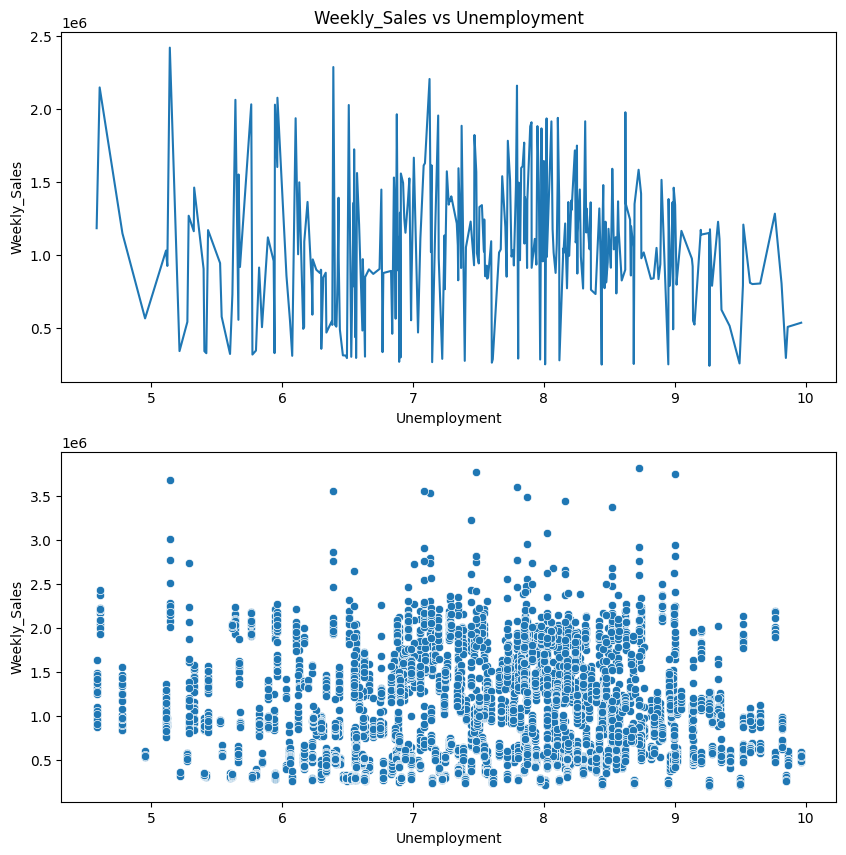

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.lineplot(x=walmart_data['Unemployment'], y=walmart_data['Weekly_Sales'], errorbar=None)
plt.title('Weekly_Sales vs Unemployment')
plt.subplot(2,1,2)
sns.scatterplot(x=walmart_data['Unemployment'], y=walmart_data['Weekly_Sales'])
plt.show()

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

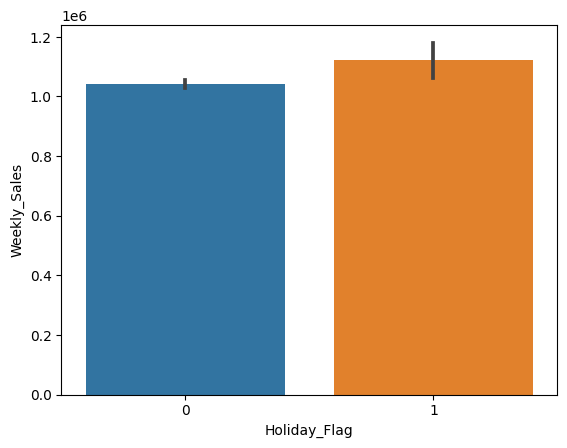

In [37]:
sns.barplot(x=data['Holiday_Flag'], y=data['Weekly_Sales'])

<h3>Correlation between Weekly Sales and other features<h3>

<Axes: >

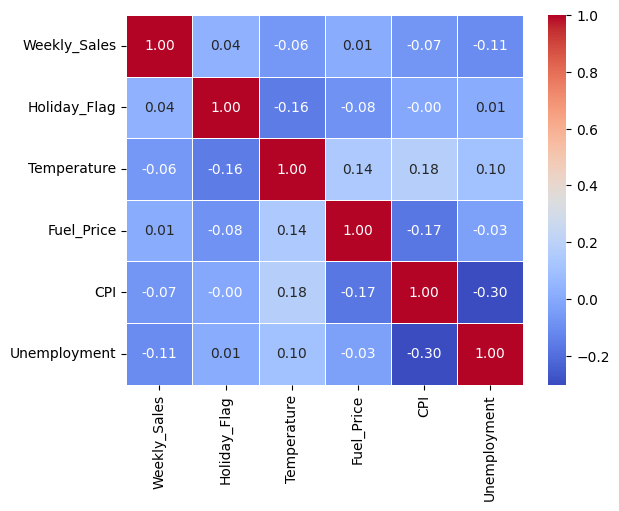

In [38]:
walmart_data = data[['Weekly_Sales','Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
sns.heatmap(walmart_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

The is no relationship between Weekly Sales and other numerical features as the correlation between them is very near to zero